В моем распоряжении данные интернет-магазина «Стримчик», который продаёт компьютерные игры. В наборе данных есть информация о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Моей **целью** является выявление закономерностей определяющих успешность игры. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на следующий год.

Для достижения этой цели были поставлены следующие задачи: 
1. Выбрать актуальный период и определить потенциально прибыльные платформы
2. Следует исследовать взаимосвязь между оценками (пользователей и критиков) и объемом продаж игр, чтобы понять, насколько важны эти факторы для успешности игр на рынке.
3. Необходимо проанализировать жанры игр и выяснить какие пользуются наибольшим спросом у потребителей 
4. Исследовать предпочтения потребителей в разных регионах и выявить различия в предпочтениях по платформам и жанрам игр, чтобы лучше спрогнозировать успешность игр на конкретных рынках.
5. Необходимо проверить определенные гипотезы о связи между рейтингами пользователей и выбранными платформами (PC и XBox) и жанрами игр(Action и Sports), чтобы получить более глубокое понимание предпочтений пользователей и их влияния на продажи.



**Описание данных**  
Данные в одном файле с названием "games.csv". В нем содержатся столбцы:  
Name — название игры  
Platform — платформа  
Year_of_Release — год выпуска  
Genre — жанр игры  
NA_sales — продажи в Северной Америке (миллионы проданных копий)  
EU_sales — продажи в Европе (миллионы проданных копий)  
JP_sales — продажи в Японии (миллионы проданных копий)  
Other_sales — продажи в других странах (миллионы проданных копий)  
Critic_Score — оценка критиков (максимум 100)  
User_Score — оценка пользователей (максимум 10)  
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


Поскольку ранее с этими данными работать не приходилось нужно будет произвести предобработку данных перед исследованием: посмотреть какие типы данных содержатся в столбцах, преобразовать при необходимости, определить есть ли пропуски в данных, и если есть то попытаться заменить их на что-то осмысленное. Также нужно посмотреть дубликаты, редкие или аномальные выбивающиеся значения, понять стоит ли от них избавляться.


####  Загрузка и знакомство с данными

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from IPython.display import display

In [2]:
# Загрузка из файла
games_data = pd.read_csv('/datasets/games.csv')

In [3]:
games_data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
games_data.shape

(16715, 11)

In [5]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В данных 16444 строк и 12 столбцов. В предобработке данных нужно будет заменить тип 'Year_of_Release' с float64 на родной тип date. Столбец User_Score является типом object, что неверно, нужно будет поменять на float64, как в столбце с 'Critic_Score'. Столбцы 'Name', 'Platform' и 'Genre' уже имеют тип данных object, который является логичным и подходящим для содержания. Продажи в разных регионах также указаны в подходящем типе float64.

array([[<AxesSubplot:title={'center':'Year_of_Release'}>,
        <AxesSubplot:title={'center':'NA_sales'}>],
       [<AxesSubplot:title={'center':'EU_sales'}>,
        <AxesSubplot:title={'center':'JP_sales'}>],
       [<AxesSubplot:title={'center':'Other_sales'}>,
        <AxesSubplot:title={'center':'Critic_Score'}>]], dtype=object)

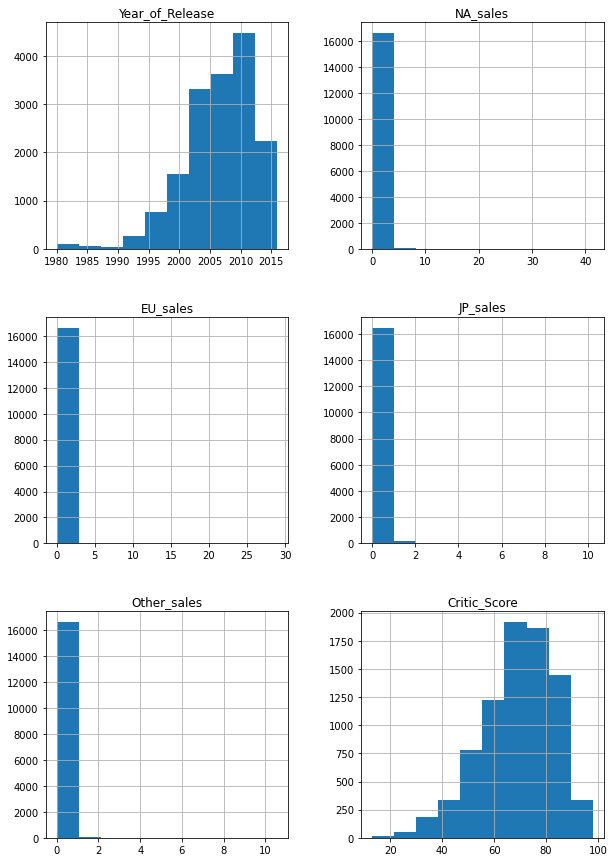

In [6]:
games_data.hist(figsize=(10, 15))

В тех столбцах с продажами видно, что график справа пустой, значит содержатся выбросы. Ознакомимся с некоторыми данными поближе

In [7]:
games_data['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Расшифровка аббревиатур. E:Everyone, M:Mature 17+, T:Teen 13+, E10+:Everyone 10+, AO:Adults Only 18+,  EC:Early Childhood,  RP:Rating Pending. 

In [8]:
games_data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [9]:
games_data['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Пришлось найти расшифровку плтформ, для общего понимания

In [10]:
platforms = {
    'Wii': 'Nintendo Wii',
    'NES': 'Nintendo Entertainment System',
    'GB': 'Game Boy',
    'DS': 'Nintendo DS',
    'X360': 'Xbox 360',
    'PS3': 'PlayStation 3',
    'PS2': 'PlayStation 2',
    'SNES': 'Super Nintendo Entertainment System',
    'GBA': 'Game Boy Advance',
    'PS4': 'PlayStation 4',
    '3DS': 'Nintendo 3DS',
    'N64': 'Nintendo 64',
    'PS': 'PlayStation',
    'XB': 'Xbox',
    'PC': 'Персональный компьютер (Personal Computer)',
    '2600': 'Atari 2600',
    'PSP': 'PlayStation Portable',
    'XOne': 'Xbox One',
    'WiiU': 'Nintendo Wii U',
    'GC': 'GameCube',
    'GEN': 'Sega Genesis',
    'DC': 'Sega Dreamcast',
    'PSV': 'PlayStation Vita',
    'SAT': 'Sega Saturn',
    'SCD': 'Sega CD',
    'WS': 'WonderSwan',
    'NG': 'Neo Geo',
    'TG16': 'TurboGrafx-16',
    '3DO': '3DO Interactive Multiplayer',
    'GG': 'Game Gear',
    'PCFX': 'PC-FX'
}

#### Предобработка данных

In [11]:
# Привести названия столбцов к нижнему регистру
games_data.columns = games_data.columns.str.lower()

##### Работа с пропусками

In [12]:
# проверка пустых значений
games_data.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

В данном случае, мне кажется не логично менять рейтинг на среднее или медиану, поскольку это может внести слишком сильное искажение в данных, ведь оценки ставят конкретной игре, а не жанру или платформе. Поменяем пустые в названии на Unknown, а 'tbd' (to be determined, значит на момент снятия данных их небыло, но они готовились появиться) на Na в User_Score, чтобы можно было сделать тип данных float.

In [13]:
# замена пустых в названии на 'Unknown'
games_data['name'].fillna('Unknown', inplace=True)

In [14]:
# Заменить тип столбца User_Score на float64, попутно заменяя 'tbd'на Na
games_data['user_score'] = games_data['user_score'].replace('tbd', None).astype(float)

In [15]:
# Установить настройку для отображения всех строк
pd.set_option('display.max_rows', None)
# выведем строки, где год равно NaN
print(games_data.loc[games_data['year_of_release'].isna()])


                                                    name platform  \
183                                      Madden NFL 2004      PS2   
377                                     FIFA Soccer 2004      PS2   
456                           LEGO Batman: The Videogame      Wii   
475                           wwe Smackdown vs. Raw 2006      PS2   
609                                       Space Invaders     2600   
627                                            Rock Band     X360   
657             Frogger's Adventures: Temple of the Frog      GBA   
678          LEGO Indiana Jones: The Original Adventures      Wii   
719                                       Call of Duty 3      Wii   
805                                            Rock Band      Wii   
1131                             Call of Duty: Black Ops       PC   
1142                                           Rock Band      PS3   
1301                                      Triple Play 99       PS   
1506                              

Честно говоря возникла идея создать функцию, которая будет обращаться к странице на вики со списком игр, например такой: 
[Ссылка на страницу Википедии](https://ru.wikipedia.org/wiki/%D0%9A%D0%B0%D1%82%D0%B5%D0%B3%D0%BE%D1%80%D0%B8%D1%8F:%D0%9A%D0%BE%D0%BC%D0%BF%D1%8C%D1%8E%D1%82%D0%B5%D1%80%D0%BD%D1%8B%D0%B5_%D0%B8%D0%B3%D1%80%D1%8B_2008_%D0%B3%D0%BE%D0%B4%D0%B0)

Там есть список названий игр за каждый год, и можно было бы написать функцию, которая проверяет название игры там, (по этой ссылке игры за 2008), и если оно там есть то писать год 2008. 

Нашла даже две библиотеки которые это делают (обращаются к сторонним сайтам из Юпитера, парсят страницу и тд), это request [документация на request](https://docs.python-requests.org/en/latest/) и beautiful soup (парсер) [ссылка на суп](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

Но, к сожалению, разобраться на смогла 🤔



In [16]:
# удаление строк в которых 
games_data = games_data.dropna(subset = ['year_of_release'])

Стоит преобразовать год выпуска в тип данных 'дата', поскольку если преобразовать в 'int' с ним невозможно будет делать группировку. Проверено.

In [17]:
# преобразование столбца в тип date
games_data['year_of_release'] = pd.to_datetime(games_data['year_of_release'], format='%Y').dt.year

In [18]:
min_date = games_data['year_of_release'].min()
max_date = games_data['year_of_release'].max()

# Вывод информации о периоде данных
print("Период данных с", min_date, "по", max_date)

Период данных с 1980 по 2016


In [19]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       8609 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Теперь с типами все хорошо

In [20]:
# создание нового столбца с суммарными продажами во всех регионах
games_data['total_sales'] = (
    games_data['na_sales'] + 
    games_data['eu_sales'] + 
    games_data['jp_sales'] +
    games_data['other_sales']
)

In [21]:
# убедимся что новый столбец корректный
games_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


У нас много пропусков в рейтинге и оценках, они не могли возникнуть при склейке данных поскольку количество пропусков разное в critic_score, user_score и  rating. Осмелюсь предположить это малораспространенные игры. Для того, чтобы это проверить посчитаем среднее и моду (чтобы выбросы не мешали) для данных с пропусками и сравними с этми метриками у всего набора.

In [22]:
# создаем новую переменную куда кладем срез, только те данные у которых в рейтинге пусто
without_rating = games_data.loc[games_data['rating'].isna()]
without_rating.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67


In [23]:
# подсчет моды для столбца сумарных продаж во всех данных и в тех что без рейтинга
moda_total_sales = games_data['total_sales'].mode()[0]
moda_total_sales_without_rating = without_rating['total_sales'].mode()[0]

print('Мода значений продаж в данных',moda_total_sales)
print('Мода значений продаж в данных без рейтинга', moda_total_sales_without_rating)

Мода значений продаж в данных 0.02
Мода значений продаж в данных без рейтинга 0.02


In [24]:
# подсчет среднего для столбца сумарных продаж во всех данных и в тех что без рейтинга
mean_total_sales = games_data['total_sales'].mean()
mean_total_sales_without_rating = without_rating['total_sales'].mean()

print('Среднее значение продаж в данных',mean_total_sales)
print('Среднее значение продаж в данных без рейтинга', mean_total_sales_without_rating)

Среднее значение продаж в данных 0.5361054359722729
Среднее значение продаж в данных без рейтинга 0.42295896975142255


Мода не отличается, а среднее отличается не сильно. Похоже моя теория о том, что рейтинга нет у малораспространенных игр не подтверилась. Может быть это просто очень старые игры?

In [25]:
# подсчет моды для столбца сумарных продаж во всех данных и в тех что без рейтинга
moda_year_of_release = games_data['year_of_release'].mode()[0]
moda_year_of_release_without_rating = without_rating['year_of_release'].mode()[0]
print('Мода в году выпуска игр во всех данных', moda_year_of_release)
print('Мода в году выпуска игр во всех данных без рейтинга', moda_year_of_release_without_rating)

Мода в году выпуска игр во всех данных 2008
Мода в году выпуска игр во всех данных без рейтинга 2010


Боюсь, органическую природу отсутсвия значений в столбцах с рейтингом мне обнаружить не удалось. На всякий случай по той же схеме проверим нет ли такого, что игры без оценки критиков и пользователей старые или плохо продаются

In [26]:
without_critic_score = games_data.loc[games_data['critic_score'].isna()]
without_user_score = games_data.loc[games_data['user_score'].isna()]

# подсчет моды для столбца сумарных продаж во всех данных и в тех что без рейтинга
moda_total_sales = games_data['total_sales'].mode()[0]
moda_total_sales_without_critic_score = without_critic_score['total_sales'].mode()[0]
moda_total_sales_without_user_score  = without_user_score['total_sales'].mode()[0]

print('Мода значений продаж в данных',moda_total_sales)
print('Мода значений продаж в данных без оценок критиков', moda_total_sales_without_critic_score)
print('Мода значений продаж в данных без оценок пользователей', moda_total_sales_without_user_score)

Мода значений продаж в данных 0.02
Мода значений продаж в данных без оценок критиков 0.02
Мода значений продаж в данных без оценок пользователей 0.02


In [27]:
# подсчет моды для столбца сумарных продаж во всех данных и в тех что без рейтинга
moda_year_of_release = games_data['year_of_release'].mode()[0]
moda_year_of_release_without_critic_score = without_critic_score['year_of_release'].mode()[0]
moda_year_of_release_without_user_score =  without_user_score['year_of_release'].mode()[0]
print('Мода в году выпуска игр во всех данных', moda_year_of_release)
print('Мода в году выпуска игр во всех данных без оценки критиков', 
      moda_year_of_release_without_critic_score)
print('Мода в году выпуска игр во всех данных без оценок пользователей',
      moda_year_of_release_without_user_score)


Мода в году выпуска игр во всех данных 2008
Мода в году выпуска игр во всех данных без оценки критиков 2009
Мода в году выпуска игр во всех данных без оценок пользователей 2010


Пожалуй, точные причины по которым отсутствуют данные в этих столбцах нам не узнать, поэтому не ясно, чем их заменить. Выкинуть эти данные с пропусками нельзя, их слишком много. Возникла идея откинуть те, у которых нет ни отзыва критиков, ни отзыва пользователей (пропуск в обоих столбцах одновременно). 

In [28]:
# Подсчет количества строк с пустыми значениями в столбцах 'critic_score' и 'user_score'
count_empty_values = (games_data[['critic_score', 'user_score']]
                      .isnull().all(axis=1).sum())

# Вывод результата
print("Количество строк с пустыми значениями в столбцах с оценкой пользователей и критиков:", 
      count_empty_values)

Количество строк с пустыми значениями в столбцах с оценкой пользователей и критиков: 7249


Оказалось их почти половина от всего набора данных. Удались не решилась, оставлю как есть.

##### Работа с выбросами

Когда мы при знакомстве с данными построили гистограммы, мы увидели, что в столбцах с продажами в разных регионах много выбросов. Стоит посмтреть нужно ли от них избавиться.

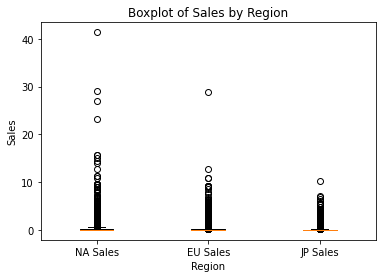

In [29]:
# Создание боксплота
data = [games_data['na_sales'], games_data['eu_sales'], games_data['jp_sales']]
labels = ['NA Sales', 'EU Sales', 'JP Sales']

plt.boxplot(data, labels=labels)
plt.xlabel('Region')
plt.ylabel('Sales')
plt.title('Boxplot of Sales by Region')
plt.show()

Выбросов действительно очень много, посмотрим них, чтобы понять, это ошибка или действительно очень успешные игры.

In [30]:
# Фильтрация значений у которых 'jp_sales', 'na_sales' или 'eu_sales' больше 10
sales_over_10m = (
    games_data[(games_data['jp_sales'] > 10) |
               (games_data['na_sales'] > 10) |
               (games_data['eu_sales'] > 10)]
)

# Подсчет количества значений
count = sales_over_10m.shape[0]

print("Количество игр у котороых больше 10 млн продаж:", count)
# Вывод значений
display(sales_over_10m)

Количество игр у котороых больше 10 млн продаж: 14


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


Данные выглядят корректными, и не похожими на аномалии. Продажи этих игр достаточно высокие в разных регионах, и названия наслуху. Удалять не будем. Посмотрим с ограницением по перцентили, чтобы увидеть, что-то еще кроме выбросов.

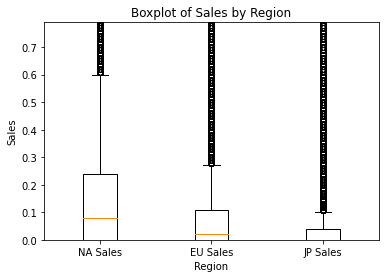

In [31]:
# Создание боксплота
data = [games_data['na_sales'], games_data['eu_sales'], games_data['jp_sales']]
labels = ['NA Sales', 'EU Sales', 'JP Sales']

plt.boxplot(data, labels=labels)
plt.xlabel('Region')
plt.ylabel('Sales')
plt.title('Boxplot of Sales by Region')
plt.ylim(0, games_data['jp_sales'].quantile(0.98))
plt.show()

Это интересно. Кажется много игр нигде не продалось? Или они просто бесплатые. Посчитаем точно сколько их.

In [32]:
countAm = games_data[games_data['na_sales']==0]['name'].count()
countE = games_data[games_data['eu_sales']==0]['name'].count()
countJ = games_data[games_data['jp_sales']==0]['name'].count()
print("Количество игр с нулевыми продажами в Северной Америке:", countAm)
print("Количество игр с нулевыми продажами в Европе:", countE)
print("Количество игр с нулевыми продажами в Японии:", countJ)

Количество игр с нулевыми продажами в Северной Америке: 4450
Количество игр с нулевыми продажами в Европе: 5767
Количество игр с нулевыми продажами в Японии: 10301


In [33]:
# хочу найти игры с нулевыми продажами во всех трех регионах
zero_sales_all_regions = (games_data[(games_data['na_sales'] == 0) 
                                     & (games_data['eu_sales'] == 0)
                                     & (games_data['jp_sales'] == 0)])

# вывести результат на экрн
print("Количество игр с нулевыми продажами во всех трех регионах:", len(zero_sales_all_regions))

Количество игр с нулевыми продажами во всех трех регионах: 3


Кажется, это довольно частое явление, когда в одном месте планеты продается игра, в другом месте нет. Игр которые не продались нигде всего три. Оставлю как есть.

##### Работа с дубликатами

In [34]:
# проверка наличия дубликатов в каждом столбце
print(games_data.apply(lambda x: x.duplicated().sum()))

name                5019
platform           16415
year_of_release    16409
genre              16433
na_sales           16045
eu_sales           16139
jp_sales           16202
other_sales        16291
critic_score       16364
user_score         16350
rating             16437
total_sales        15442
dtype: int64


Везде кроме навания игр нормально наличие дубликатов, посмотрим на них повнимательнее

In [35]:
# создаем список дубликатов
duplicates = games_data[games_data.duplicated(subset='name', keep=False)]

# дополняем дубликаты оригиналами, чтобы было понятно 
# отличаются ли чем то другим от дубликатов кроме имени
duplicates_and_originals = games_data[games_data['name'].isin(duplicates['name'])]

# настройки для вывода всех строк и колонок
print(duplicates_and_originals.sort_values(by='name').head(10))

                               name platform  year_of_release     genre  \
3358           Frozen: Olaf's Quest      3DS             2013  Platform   
3862           Frozen: Olaf's Quest       DS             2013  Platform   
1285         007: Quantum of Solace     X360             2008    Action   
14658        007: Quantum of Solace       PC             2008    Action   
1785         007: Quantum of Solace      PS3             2008    Action   
4475         007: Quantum of Solace      PS2             2008    Action   
3120         007: Quantum of Solace      Wii             2008    Action   
9507         007: Quantum of Solace       DS             2008    Action   
2243   007: The World is not Enough       PS             2000    Action   
1204   007: The World is not Enough      N64             2000    Action   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
3358       0.27      0.27      0.00         0.05           NaN         NaN   
3862       0.21   

Стало понятно что отличается платформа, посмотрим на тех, у кого имя, платформа и год выпуска совпадает

In [36]:
# Поиск дубликатов по столбцам name и platform и year_of_release, считаем сколько их штук
duplicates = (
    games_data.duplicated(subset=['name', 'platform','year_of_release'], keep=False)
    .sum()
)
print('Количество игр с одинаковым именем, годом выпуска и платформой', duplicates)

Количество игр с одинаковым именем, годом выпуска и платформой 4


In [37]:
# выведем строки на экран
duplicates = (
    games_data[games_data.duplicated(subset=['name', 'platform','year_of_release' ], keep=False)]
)
print(duplicates.sort_values(by='name'))

                name platform  year_of_release   genre  na_sales  eu_sales  \
604    Madden NFL 13      PS3             2012  Sports      2.11      0.22   
16230  Madden NFL 13      PS3             2012  Sports      0.00      0.01   
659          Unknown      GEN             1993     NaN      1.78      0.53   
14244        Unknown      GEN             1993     NaN      0.00      0.00   

       jp_sales  other_sales  critic_score  user_score rating  total_sales  
604        0.00         0.23          83.0         5.5      E         2.56  
16230      0.00         0.00          83.0         5.5      E         0.01  
659        0.00         0.08           NaN         NaN    NaN         2.39  
14244      0.03         0.00           NaN         NaN    NaN         0.03  


Я решила избаиться от дубликатов, а именно сложить данные о продажах в разных регионах. Видно, что у некоторых есть данные в одном столбце и нет в другом, таким образом эти дубликаты, вероятно, возникли при объединении данных из разных регионов. Прежде чем работать стоит посмотреть размер данных до манипуляций

In [38]:
print("Размерность данных до: ", games_data.shape)

Размерность данных до:  (16446, 12)


In [39]:
# объединение дубликатов и суммирование данных в столбцах 'na_sales' и 'eu_sales'
combined_duplicates = duplicates.groupby(['name', 'platform', 'year_of_release']).agg({ 
    'na_sales': 'sum',
    'eu_sales': 'sum',
    'jp_sales': 'sum',
    'other_sales': 'sum'
}).reset_index()

# удаление исходных дубликатов из исходного набора данных
games_data.drop_duplicates(
    subset=['name', 'platform', 'year_of_release'], keep=False, inplace=True
)

# добавление объединенных дубликатов к исходному набору данных
games_data = pd.concat([games_data, combined_duplicates], ignore_index=True)

In [40]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16442 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7981 non-null   float64
 9   user_score       8607 non-null   float64
 10  rating           9766 non-null   object 
 11  total_sales      16442 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


Проверим, что дубликаты исчезли, а размер стал чуть короче

In [41]:
# Поиск дубликатов по столбцам name и platform и year_of_release, считаем сколько их штук
duplicates_after = (
    games_data.duplicated(subset=['name', 'platform','year_of_release'], keep=False)
    .sum()
)
print(duplicates_after)

0


In [42]:
print("Размерность данных после: ", games_data.shape)

Размерность данных после:  (16444, 12)


Итого удалили целых две строки полных дубликатов. Горжусь собой.

#### Исследовательский анализ данных

##### Посмотрим, сколько игр выпускалось в разные годы

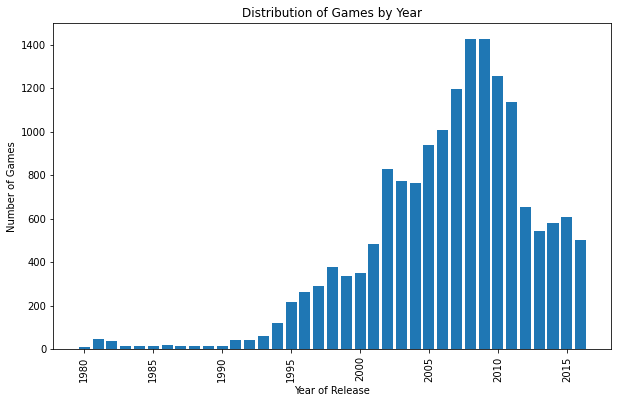

In [43]:
# Создание сводной таблицы по годам выпуска игр
year_counts = games_data.groupby('year_of_release').size().reset_index(name='count')

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.bar(year_counts['year_of_release'], year_counts['count'])
plt.xlabel('Year of Release')
plt.ylabel('Number of Games')
plt.title('Distribution of Games by Year')
plt.xticks(rotation=90)
plt.show()

Логично, что в развитием технологий у нас стало появляться все больше игр. Интересно, с чем связан спад после 2010 года? Хочется верить, что создатели стали вкладываться в качество, а не количество. В любом случае, мы прогнозируем продажи на 2017 год, поэтому стоит брать для анаиза данные за ближайшие 3-5 лет, а то и последний год.

##### Посмотрим, как менялись продажи по платформам

Посмотрим на сумарные прожади по всем консолям за все годы в наборе данных

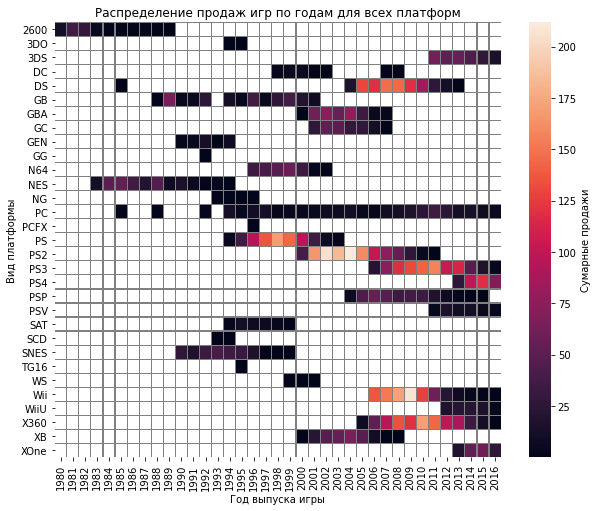

In [44]:
pivot_table = games_data.pivot_table(
    index='platform', 
    columns='year_of_release', 
    values='total_sales', 
    aggfunc='sum'
)

# Создание тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=False, cbar_kws={'label': 'Cумарные продажи'},
            linewidths=0.1, linecolor='grey')
plt.title('Распределение продаж игр по годам для всех платформ')
plt.xlabel('Год выпуска игры')
plt.ylabel('Вид платформы')
plt.show()

На этой тепловой карте хорошо видно, как менялись сумарные продажи игр для каждой игрвовой платформы со временем. Так например,игры на старые консоли PS, PS2, PS3 утратили актульаность, хотя в определенный момент времени были на пике популярности. Подобным обраом выглядит интрес к Wii, когда то в 2009 имевшем бешеную популярность, сейчас, вероятно либо уйдет в прошлое, либо будет постепенно терять интрес. К PS4 имела максимальные продажи игр в 2014-1015, интрес уже пошел на спад, но продажи все еще высокие.
Тоже касается 3DS, XOne, X360, кажется уровень продаж иссякнет в ближайшие годы.

Самым стабильным являются продажи для PC, они всегда были невысокие, однако, в силу доступности, очевидно, игры для компьютера все равно будут покупать. 

Таким образом, из этой тепловой карты мы видим, что средний срок интереса к конкретным платформам составляет 6 - 10 лет, пик интереса приходитя на 2 - 3 год. Также можно сделать вывод, что если в первые годы платформа не приобрела популярность  - скорее всего уже поезд ушел, дальше будет только спад. Нарекаю пятилетный срок актуальным периодом.

In [45]:
pivot_table

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
2600,11.38,35.68,28.88,5.84,0.27,0.45,0.67,1.94,0.74,0.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14
DC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.02,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,NaN,NaN,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,...,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN
GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.43,64.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GBA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


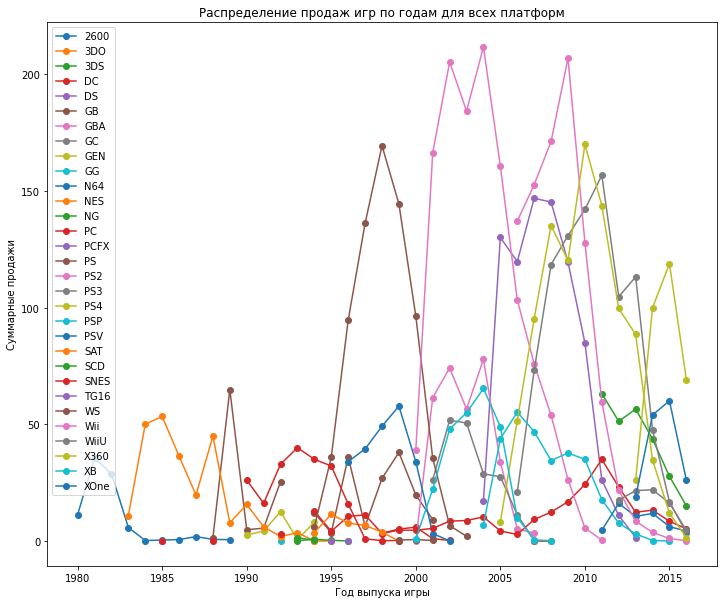

In [46]:
plt.figure(figsize=(12, 10))
# Перебор строк таблицы
for i, row in pivot_table.iterrows():
    platform = row.name  # Вид платформы
    sales = row.values  # Продажи по годам для данной платформы
    years = pivot_table.columns  # Годы

    # Построение линейной диаграммы
    plt.plot(years, sales, marker='o', label=platform)

# Настройка осей и меток
plt.title('Распределение продаж игр по годам для всех платформ')
plt.xlabel('Год выпуска игры')
plt.ylabel('Суммарные продажи')
plt.legend()

# Отображение линейных диаграмм
plt.show()

Выберем данные за последние 5 лет, и посмотрим на них.

In [47]:
actual_data = (games_data
               .loc[(games_data['year_of_release'] >= 2012) 
                    & (games_data['year_of_release'] <= 2016)]
)
# Вывод результатов
print('Количество строк в данных за послеждние 5 лет:', actual_data.shape[0])

Количество строк в данных за послеждние 5 лет: 2885


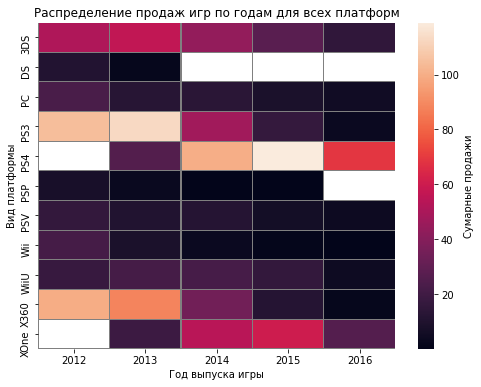

In [48]:
pivot_table = actual_data.pivot_table(
    index='platform', 
    columns='year_of_release', 
    values='total_sales', 
    aggfunc='sum'
)

# Создание тепловой карты
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=False, cbar_kws={'label': 'Cумарные продажи'},
            linewidths=0.1, linecolor='grey')
plt.title('Распределение продаж игр по годам для всех платформ')
plt.xlabel('Год выпуска игры')
plt.ylabel('Вид платформы')
plt.show()

Хитмап подсказывает, что PC является стабильной платформой но с относительно низкими продажами игр. Можно продолжать выпускать игры для этой платформы, так как она остается актуальной всегда.

Платформы XOne и PS4 показывают хорошие продажи и достигли пика популярности в последние пару лет. В ближайшие несколько лет все еще можно ожидать хороших продаж игр для этих платформ.

Платформы Wii, 3DS и PS3, хотя и имеют некоторые продажи, показывают упадок актуальности. В ближайшем будущем их популярность будет снижаться. 

Взглянем на боксплот, чтобы окончательно сформировать понимание какие платформы будут приносят хорошую прибыль.

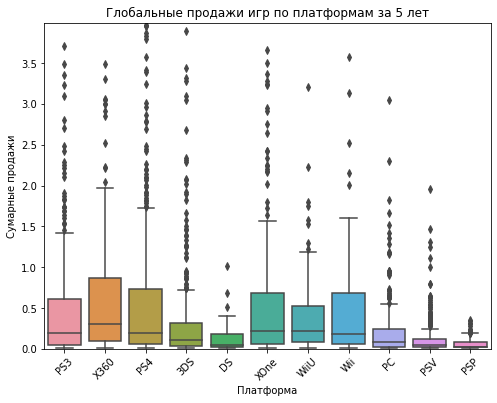

In [49]:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='platform', y='total_sales', data=actual_data)
plt.title('Глобальные продажи игр по платформам за 5 лет')
plt.xlabel('Платформа')
plt.ylim(0, actual_data['total_sales'].quantile(0.98))
plt.ylabel('Cумарные продажи')
plt.xticks(rotation=45)
plt.show()

Здесь мы видим, что хорошую прибыль принесли игры на платформе X360, PS4, Wii и XOne. Боксплот дает возможность оценить ретроспективно выручку с продаж, однако, только боксплота недостаточно для оценки будущих перспектив, так напрмиер, PS3 принесла хорошую прибыль, но вкладываться в игры на ней уже не стоит, ведь ее пик продаж пройден примерно в 2010, и сейчас идет на спад, как видно из хитмап.


In [50]:
# Группировка данных по платформе и расчет медианы
median_data = actual_data.groupby('platform')['total_sales'].agg(['median'])


# Вывод результатов
print(median_data)

          median
platform        
3DS         0.11
DS          0.05
PC          0.08
PS3         0.20
PS4         0.20
PSP         0.03
PSV         0.05
Wii         0.18
WiiU        0.22
X360        0.31
XOne        0.22


Средние продажи за последние 5 лет наиболее высокие у платформы X360, с медианой около 0.3, что может указывать на ее популярность и коммерческий успех. Эта платформа также характеризуется самым большим межквартильным размахом, что указывает на значительную вариабельность и разброс значений в данных.  Это может быть связано с популярностью конкретных игр на этой платформе.

Немного меньший межквартильный размах и одинаковые средние продажи наблюдаются у платформ PS3, PS4 , WiiU и XOne(около 0.2). Меньший разброс значений говорит о  более стабильных продажах. Платформа PS3 имеет интересный выброс в виде игры GTA 5, продавшейся в количестве больше 20 миллионов копий. Этот выброс значительно удален от медианы и может сильно искажать общую картину продаж для данной платформы.

У игр для платформ X360, PS4 и 3DS также присутствуют выбросы, которые значительно удалены от медианы. Интересно, что выбросы на этих платформах очень схожи. Тоесть если игра начала пользоваться бешенной популярностью, то продажи взлетают сразу на всех платформах.

Платформы 3DS, Wii  и PC со средним около 0.1 показывают более низкие значения межквартильного размаха, что указывает на меньшую вариабельность в продажах.Кроме того эти платормы имеют некоторое количество выбросов, однако они менее значительны и не сильно удалены от медианы. 

Самые низкие значения межквартильного размаха наблюдаются у платформ с медианой  колоко 0.05, это PSP и PSV. Значения состредоточены плотно вокруг медианы. Также на играх для этих платформ наблюдается наименьшее количество выбросов, и они имеют наименьшее удаление от медианы. Все это в целом может говорить о низком спросе на эти игры.

**Подвывод:**

Я бы рекомендовала сосредоточиться на играх для платформ с высокими средними продажами продажи за последние 5 лет: X360, PS3, PS4, WiiU и XOne, они могут представлять потенциально прибыльные рынки.

Не стоит выкидывать из рассмотрения платформы 3DS, Wii и PC, которые имеют более стабильные продажи и меньший межквартильный размах. Это может свидетельствовать о наличии постоянной аудитории или стабильных игровых предпочтениях на этих платформах (риск выпуска плохо продаваемой игры ниже). Актуальность этих платформ будет постепенно идти на спад, но пока еще игры для этих платформ будут неплохо продаваться

Платформы PSP и PSV показывают самые низкие значения продаж. Это может указывать на низкий спрос на игры на этих платформах. Выпуск игр для этих платформ, вероятно, будет не прибыльным.

##### Влияние отзывов  пользователей и критиковна  продажи игр  внутри  платформ

Посмотрим на наиболее популярные платформы за поледние пять лет и посчитаем корреляцию между отзывами и продажами.

In [51]:
# Выбор платформ с наибольшими суммарными продажами из данные за последние 5 лет
top_platforms = actual_data.groupby('platform')['total_sales'].sum().nlargest(3)
display('Платформы с наибольшими суммарными продажами за последние 5 лет', top_platforms)

'Платформы с наибольшими суммарными продажами за последние 5 лет'

platform
PS4     314.14
PS3     286.22
X360    236.54
Name: total_sales, dtype: float64

In [52]:
# Фильтрация данных для выбранной платформы
top_platform_data = actual_data[actual_data['platform'].isin(top_platforms.index)]
print('Количество игр с трех популярных платформ за посление 5 лет:',top_platform_data.shape[0])

Количество игр с трех популярных платформ за посление 5 лет: 1176


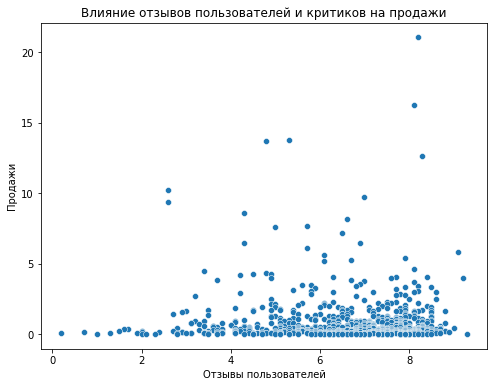

In [53]:
# Построение диаграммы рассеяния между отзывами пользователей и сумарными продажами
plt.figure(figsize=(8, 6))
sns.scatterplot(x='user_score', y='total_sales',data = top_platform_data)
plt.title('Влияние отзывов пользователей и критиков на продажи')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Продажи')
plt.show()

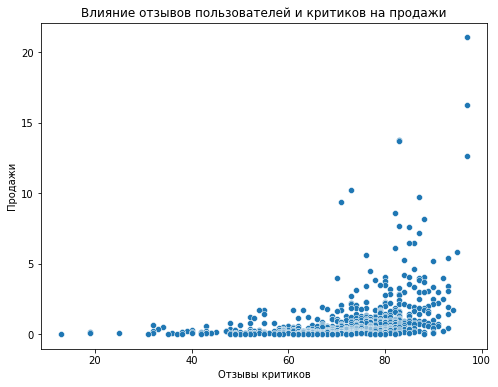

In [54]:
# Построение диаграммы рассеяния между отзывами пользователей и сумарными продажами
plt.figure(figsize=(8, 6))
sns.scatterplot(x='critic_score', y='total_sales',data = top_platform_data)
plt.title('Влияние отзывов пользователей и критиков на продажи')
plt.xlabel('Отзывы критиков')
plt.ylabel('Продажи')
plt.show()

Посчитаем коэффициент корреляции между отзывами и продажами

In [55]:
correlation_users = top_platform_data['user_score'].corr(top_platform_data['total_sales'])
correlation_critics = top_platform_data['critic_score'].corr(top_platform_data['total_sales'])
print("Корреляция между оценками пользователей и продажами: {:.2f}".format(correlation_users))
print("Корреляция между оценками критиков и продажами: {:.2f}".format(correlation_critics))

Корреляция между оценками пользователей и продажами: -0.01
Корреляция между оценками критиков и продажами: 0.36


Такой коэффициент корреляции между оценками пользователей и продажами =  -0.01 указывает на очень слабую даже обратную корреляцию. Это означает, что нет зависимости между оценками пользователей и продажами игр. Значение корреляции в 0.36 между оценками критиков и продажами указывает на слабую положительную корреляцию. Это означает, что есть некоторая связь между оценками критиков и продажами игр.

Обращает на себя внимание тот факт, что прктически нет случаев, когда отзывы пользователей и критиков **низкие**, а игра продается хорошо. Одновременно с тем, игры у которых **высокие** оценки критиков и пользователей не всегда продаются хорошо. Могу предположить, что это отызвы проплаченые, либо игры очень сильно на любителя.

Посмотрим на другие платформы и их зависимости

In [56]:
# Список платформ за последние 5 лет
platforms_list = actual_data['platform'].unique()
print(platforms_list)

['PS3' 'X360' 'PS4' '3DS' 'DS' 'XOne' 'WiiU' 'Wii' 'PC' 'PSV' 'PSP']


In [57]:
for platform in platforms_list:
    platform_data = actual_data[actual_data['platform'] == platform]
    correlation_users = platform_data['user_score'].corr(platform_data['total_sales'])
    print("Корреляция между оценками пользователей и продажами: {:.2f} для платформы '{}'"
          .format(correlation_users, platform))

Корреляция между оценками пользователей и продажами: -0.01 для платформы 'PS3'
Корреляция между оценками пользователей и продажами: 0.01 для платформы 'X360'
Корреляция между оценками пользователей и продажами: -0.03 для платформы 'PS4'
Корреляция между оценками пользователей и продажами: 0.20 для платформы '3DS'
Корреляция между оценками пользователей и продажами: 0.59 для платформы 'DS'
Корреляция между оценками пользователей и продажами: -0.07 для платформы 'XOne'
Корреляция между оценками пользователей и продажами: 0.40 для платформы 'WiiU'
Корреляция между оценками пользователей и продажами: 0.05 для платформы 'Wii'
Корреляция между оценками пользователей и продажами: -0.12 для платформы 'PC'
Корреляция между оценками пользователей и продажами: 0.00 для платформы 'PSV'
Корреляция между оценками пользователей и продажами: -0.81 для платформы 'PSP'


Обращает на себя внимание коэффициент 0.59 для платформы 'DS', 0.40 для платформы 'WiiU'и особенно-0.71 для платформы 'PSP'. Значение 0.59 для платформы 'DS' указывает на умеренную прямую связь между оценками пользователей и продажами. Это означает, что более высокие оценки пользователей часто соответствуют более высоким продажам для игр на платформе 'DS'.

Значение 0.40 для платформы 'WiiU' также указывает на умеренную прямую связь между оценками пользователей и продажами. Это означает, что более высокие оценки пользователей связаны с более высокими продажами игр на платформе 'WiiU'.

Но самое удивительно, значение -0.71 для платформы 'PSP', которое указывает на достаточно сильную обратную связь между оценками пользователей и продажами. Это означает, что более высокие оценки пользователей обычно соответствуют более низким продажам для игр на платформе 'PSP', что странно.

Посмотрим как выглядят графики рассеяния для этих интересных платформ

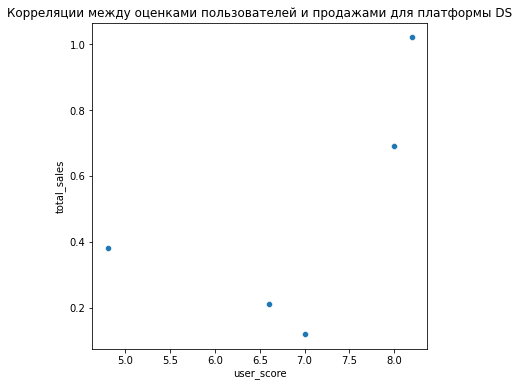

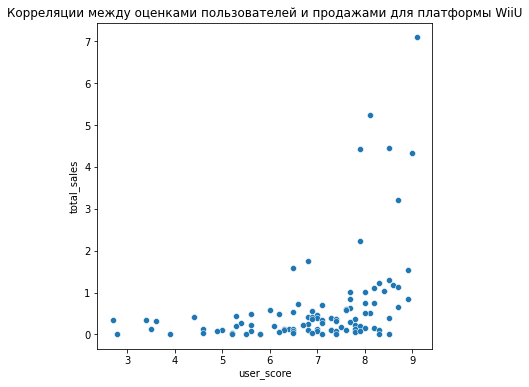

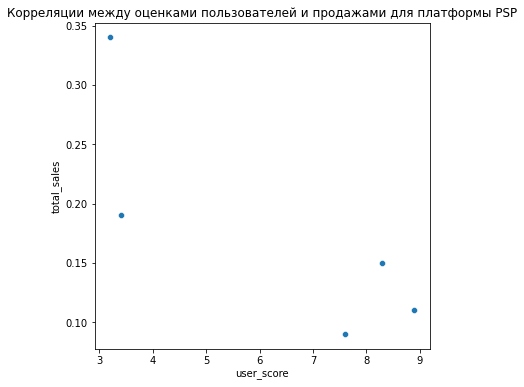

In [58]:
platforms_of_interest = ['DS', 'WiiU','PSP']
for platform in platforms_of_interest:
    platform_data = actual_data[actual_data['platform'] == platform]
    my_plt = sns.scatterplot(data=platform_data, x='user_score', y='total_sales')
    my_plt.figure.set_size_inches(6, 6)
    plt.title('Корреляции между оценками пользователей и продажами для платформы {}'
              .format(platform))
    plt.show()

Боюсь графики подсказывают, что данных слишком мало, чтобы сделать выводы о корреляции. Только для 'WiiU' нам удалось найти умеренную прямую связь между оценками пользователей и продажами. Посмотрим будут ли более влиятельны отзывы критиков

In [59]:
for platform in platforms_list:
    platform_data = actual_data[actual_data['platform'] == platform]
    correlation_users = platform_data['critic_score'].corr(platform_data['total_sales'])
    print("Корреляция между оценками критиков и продажами: {:.2f} для платформы '{}'"
          .format(correlation_users, platform))


Корреляция между оценками критиков и продажами: 0.33 для платформы 'PS3'
Корреляция между оценками критиков и продажами: 0.36 для платформы 'X360'
Корреляция между оценками критиков и продажами: 0.41 для платформы 'PS4'
Корреляция между оценками критиков и продажами: 0.32 для платформы '3DS'
Корреляция между оценками критиков и продажами: nan для платформы 'DS'
Корреляция между оценками критиков и продажами: 0.42 для платформы 'XOne'
Корреляция между оценками критиков и продажами: 0.35 для платформы 'WiiU'
Корреляция между оценками критиков и продажами: -0.42 для платформы 'Wii'
Корреляция между оценками критиков и продажами: 0.24 для платформы 'PC'
Корреляция между оценками критиков и продажами: 0.09 для платформы 'PSV'
Корреляция между оценками критиков и продажами: nan для платформы 'PSP'


/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Ошибка сообщает, что данных слишком мало для подсчета корреляции для некоторых платформ. Построим графики для платформ с корреляцией выше 0.3

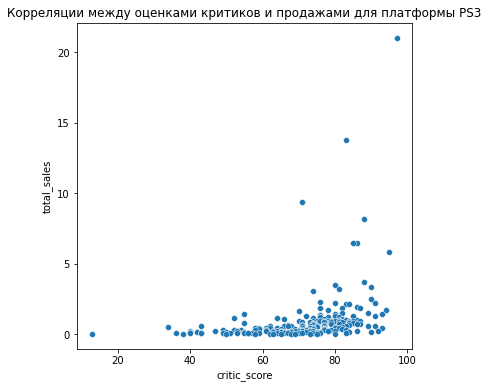

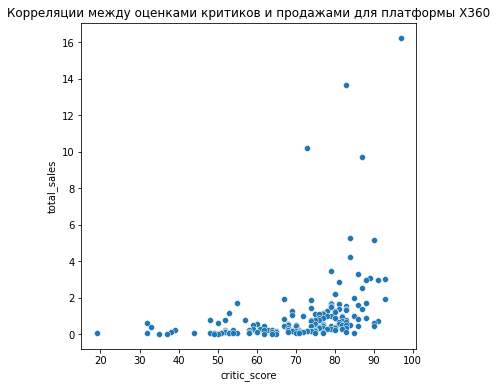

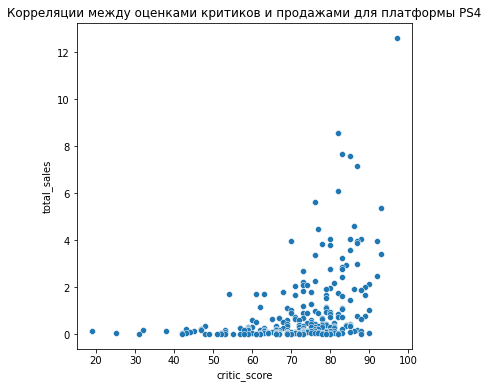

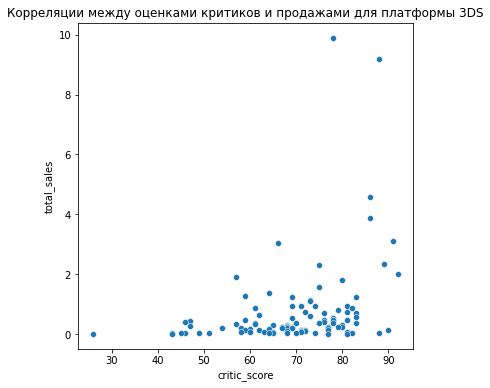

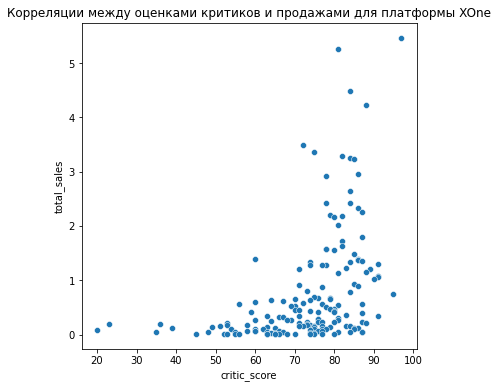

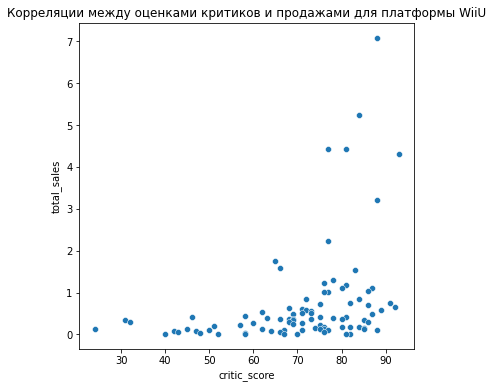

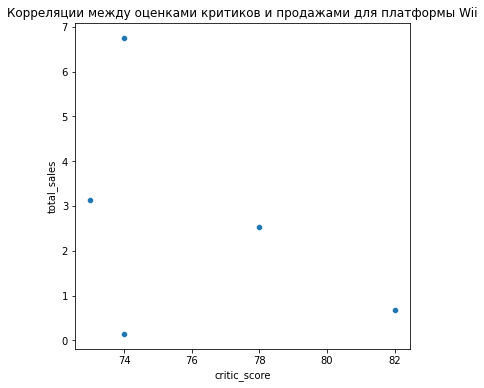

In [60]:
# Напишем функцию которая будет строить графики в цикле
platforms_of_interest = ['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii']
for platform in platforms_of_interest:
    platform_data = actual_data[actual_data['platform'] == platform]
    my_plt = sns.scatterplot(data=platform_data, x='critic_score', y='total_sales')
    my_plt.figure.set_size_inches(6, 6)
    plt.title('Корреляции между оценками критиков и продажами для платформы {}'.format(platform))
    plt.show()
    

Очевидно, для 'Wii' недостаточно данных, чтобы иметь представление о корреляции. Во всех остальных случаях мы видим умеренную и слабую прямую связь между отзывами критиков и продажами игр для конкретных платформ. Более высокие оценки критиков связаны с более высокими продажами игр на платформах. 

Подвывод: Почти для всех платформ влияние критиков можно назвать умеренно-слабым, так например при покупке игр для PS4 и XboxOne пользователи чаще прислушиваются к мнению критиков, чем обладатели карманных приставок или PC. Могу предположить, что для этих приставок игры дороже, и перед покупкой потребители более тщательно изучают отзывы и прислушиваются к мнению игровых критиков. К сожеланию, данных о цене игр у нас нет, чтобы проверить это.

Что касается отзывов пользователей, то зависимости нет. Люди могут ставить любые оценки, по сути, это не скажется на продажах.

##### Посмотрим на общее распределение игр по жанрам.

Посмотрим какую долю составляют разные жанры и какую долю прибыли они приносят. Построим круговые диаграммы и боксплот.

In [61]:
# Подсчет количества игр разных жанров
genre_counts = actual_data['genre'].value_counts()
print(genre_counts)


Action          1031
Role-Playing     370
Adventure        302
Sports           266
Shooter          235
Misc             192
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: genre, dtype: int64


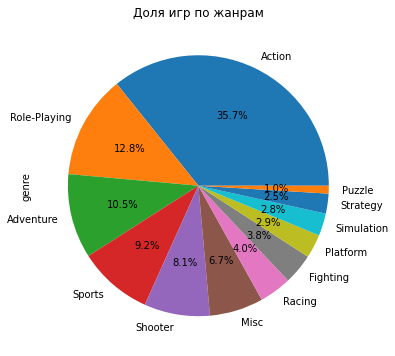

In [62]:
# Построение круговой диаграммы
plt.figure(figsize=(10, 6))
genre_counts.plot.pie(autopct='%1.1f%%')
plt.title('Доля игр по жанрам')

plt.show()

Больше 35 процентов игр на всех платформах в жанре Экшон(Action), создатели явно стараются вкладываться в этот жанр. Затем идут RPG (ролевые игры) с 12 процентами и Приключения (Adventure). По 9 процентов у Спорт и Шутеров, остальные занимают незначительные доли.

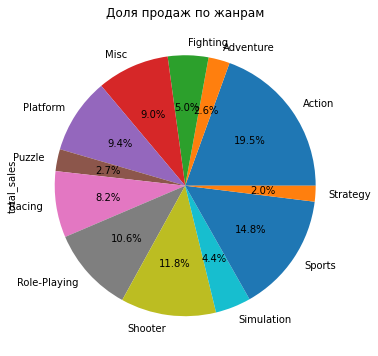

In [63]:
# Группировка данных по жанрам и суммирование total_sales
genre_sales = games_data.groupby('genre')['total_sales'].sum()

plt.figure(figsize=(10, 6))
genre_sales.plot.pie(autopct='%1.1f%%')
plt.title('Доля продаж по жанрам')

plt.show()

Видимо не зря так много игр в жанре Экшон (action), ведь пятая часть всех продаваемых игр в этом жанре. Почти 15 процентов то спортивные игры, 11 шутеры и 10 RPG (ролевые). Интересно, что 10 процентов рынка занимают Приключения(по количеству игр), а продаются в этом жанре игры плохо, всего 2 процента продаж. 

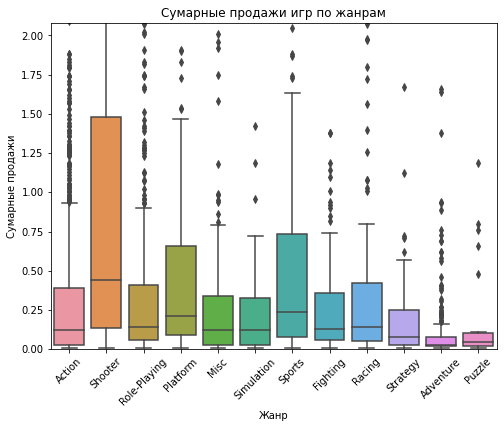

In [64]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='genre', y='total_sales', data=actual_data)
plt.title('Cумарные продажи игр по жанрам')
plt.xlabel('Жанр')
plt.ylim(0, actual_data['total_sales'].quantile(0.95))
plt.ylabel('Cумарные продажи')
plt.xticks(rotation=45)
plt.show()

На боксплоте можно заметить, что у жанра "Шутеры" имеется значительный разброс, что указывает на нестабильность в объемах продаж. Этот жанр может иметь как очень плохие продажи, так и игры, пользующиеся большой популярностью среди пользователей. Также по графику можно увидеть, что жанры "Платформеры", "Гонки" и игры в жанре "Экшон" (Action) следуют за "Шутерами", продаются немного хуже, но все еще приносят прибыль. Однако игры в жанрах "Приключения" или "Головоломки" продаются очень плохо, средние продажи низкие, и нет игр, которые получили большую популярность среди пользователей.

In [65]:
# Группировка данных по жанру и расчет медианы
median_data = actual_data.groupby('genre')['total_sales'].agg('median')


# Вывод результатов
print(median_data)

genre
Action          0.120
Adventure       0.030
Fighting        0.130
Misc            0.120
Platform        0.210
Puzzle          0.045
Racing          0.140
Role-Playing    0.140
Shooter         0.440
Simulation      0.120
Sports          0.240
Strategy        0.080
Name: total_sales, dtype: float64


Жанр "Шутеры" (Shooter) имеет самую высокую медиану продаж (0.440 млн копий), видимо, стоит ожидать высоких продаж в ближайшие несколько лет. Однако, стоит замеить, что это жанр также имеет высокий показатель стандартного отклонения, что говорит о высоком разнообразии популярности игр этой категории. Жанры "Спорт"(Sports) и RPG (Role-Playing) также имеют относительно высокие медианы продаж (0.240 и 0.140 соответственно). Игры в этих жанрах также будут востребованы. Игры жанра Жанры "Экшон" (Action), "Симулторы" (Simulation) и "Гонки" (Racing) имеют средние продажи (медиану) в диапазоне от 0.120 до 0.140, и относительно не высокий показатель стандартного отклонения, и это означает, что эти жанры все еще приносят прибыль, однако, вероятно, в связи со вкусовыми предпочтениям пользователей, врядли даже очень качественные игры этого жанра принесут сверхприбыль.

Наиболее низкие продажи имеют игры жанры "Приключения" (Adventure), "Головоломки" (Puzzle) и "Стратегии" (Strategy) имеют наименьшие медианы продаж (от 0.030 до 0.080). Эти жанры явно относятся к категории "плохо продаваемых жанров". Даже игры, которые представляют собой выбросы для эих жанров (суперпопулярные), редко превышают средние показатели продаж по передовым жанрам.

**Подвывод**: Я бы рекомендовала для разработки игр сосредоточиться на играх жанр "Шутеры" (Shooter) является самым продаваемым и прибыльным на рынке. Высокие объемы продаж указывают на его потенциальную популярность, и широкий охват пользовательской аудитории.
Для получения высоких продаж и прибыли, рекомендуется уделять особое внимание разработке и выпуску игр в жанрах "Спорт", "RPG" и "Экшн", в то время как игры в жанрах "Приключения", "Головоломки" и "Стратегии" могут иметь ограниченную коммерческую успешность.

#### Портрет пользователя каждого региона

##### Самые популярные платформы в каждом регионе

Посмотрим на самые популярные платформы в каждой части света за последние 5 лет.

In [66]:
# Группируем данные по платформам и суммируем значения продаж
# для каждой платформы в каждом регионе из данные за последние 5 лет
region_platform_sales = (actual_data.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']]
                         .sum())

In [67]:
display(region_platform_sales)

,na_sales,eu_sales,jp_sales
platform,,,
3DS,55.31,42.64,87.79
DS,4.59,3.53,3.72
PC,19.12,37.76,0.00
PS3,103.38,106.86,35.29
PS4,108.74,141.09,15.96
PSP,0.13,0.42,10.47
PSV,10.98,11.36,21.04
Wii,17.45,11.92,3.39
WiiU,38.10,25.13,13.01


In [68]:
games_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [69]:
# Отсортируем значения продаж в каждом регионе и выберем топ-5 платформ
top_platforms_na = region_platform_sales['na_sales'].nlargest(5)
top_platforms_eu = region_platform_sales['eu_sales'].nlargest(5)
top_platforms_jp = region_platform_sales['jp_sales'].nlargest(5)

In [70]:
top_platforms_na

platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
Name: na_sales, dtype: float64

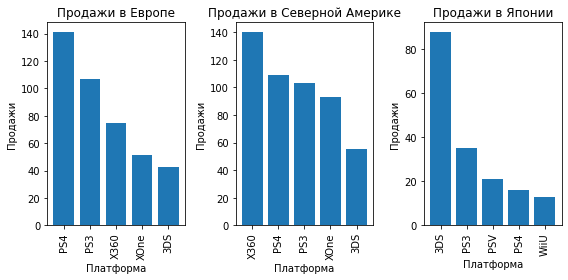

In [71]:
plt.figure(figsize=(8, 4))

# Построение графика для Европы
plt.subplot(1, 3, 1) # создает сетку графиков с одной строкой и тремя столбцами
plt.bar(top_platforms_eu.index, height=top_platforms_eu.values)
plt.xticks(rotation='vertical')
plt.title('Продажи в Европе')
plt.xlabel('Платформа')
plt.ylabel('Продажи')

# Построение графика для Америки
plt.subplot(1, 3, 2) # второй график в сетке
plt.bar(top_platforms_na.index, height=top_platforms_na.values)
plt.xticks(rotation='vertical')
plt.title('Продажи в Северной Америке')
plt.xlabel('Платформа')
plt.ylabel('Продажи')

# Построение графика для Японии
plt.subplot(1, 3, 3) # третий играфик в сетке
plt.bar(top_platforms_jp.index, height=top_platforms_jp.values)
plt.xticks(rotation='vertical')
plt.title('Продажи в Японии')
plt.xlabel('Платформа')
plt.ylabel('Продажи')

plt.tight_layout() # для установки оптимальных промежутков между подграфиками, 
# но работает через раз
plt.show()

В пятерке лучших платформ у всех трех регионов за последние 5 лет есть общие платформы - PS4, PS3, 3DS значит игры для этих платформ продаются одинаково хорошо по всему миру. Но есть и предпочтения в каждом регионе, например, WiiU  и PSV вошли в пятерку только в Японии, с учетом 3DS можно сделать вывод что японцы отдают предпочтение карманным приставкам. А вот Xbox360 и XboxOne более популярны в Европе и Америке чем в Японии. В целом, в топ 5 у Америки и Европы  вошли игры для одинакового набора платформ, однако в Европе чуть больше предпочитают PlayStation, а в Америке XBox. 

##### Самые популярные жанры в регионе

In [72]:
# Группируем данные по жанрам и суммируем значения продаж
# для каждой платформы в каждом регионе из данные за последние 5 лет
region_genre_sales = (actual_data.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']]
                         .sum())

In [73]:
display(region_genre_sales)

,na_sales,eu_sales,jp_sales
genre,,,
Action,177.84,159.34,52.80
Adventure,8.92,9.46,8.24
Fighting,19.79,10.79,9.44
Misc,38.19,26.32,12.86
Platform,25.38,21.41,8.63
Puzzle,1.13,1.40,2.14
Racing,17.22,27.29,2.50
Role-Playing,64.00,48.53,65.44
Shooter,144.77,113.47,9.23


In [74]:
# Отсортируем значения продаж в каждом регионе и выберем топ-5 платформ
top_genre_na = region_genre_sales['na_sales'].nlargest(5)
top_genre_eu = region_genre_sales['eu_sales'].nlargest(5)
top_genre_jp = region_genre_sales['jp_sales'].nlargest(5)

In [75]:
top_genre_na

genre
Action          177.84
Shooter         144.77
Sports           79.42
Role-Playing     64.00
Misc             38.19
Name: na_sales, dtype: float64

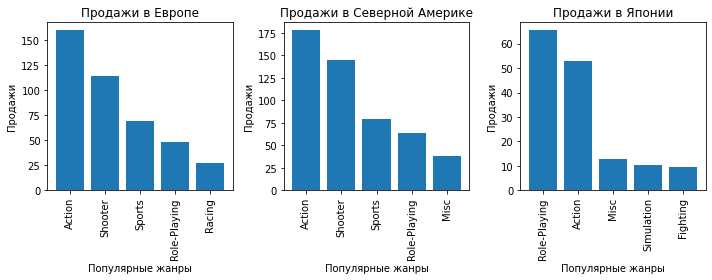

In [76]:
plt.figure(figsize=(10, 4))

# Построение графика для Европы
plt.subplot(1, 3, 1) # первый график
plt.bar(top_genre_eu.index, height=top_genre_eu.values)
plt.xticks(rotation='vertical')
plt.title('Продажи в Европе')
plt.xlabel('Популярные жанры')
plt.ylabel('Продажи')

# Построение графика для Америки
plt.subplot(1, 3, 2) # второй график в сетке
plt.bar(top_genre_na.index, height=top_genre_na.values)
plt.xticks(rotation='vertical')
plt.title('Продажи в Северной Америке')
plt.xlabel('Популярные жанры')
plt.ylabel('Продажи')

# Построение графика для Японии
plt.subplot(1, 3, 3) # третий играфик в сетке
plt.bar(top_genre_jp.index, height=top_genre_jp.values)
plt.xticks(rotation='vertical')
plt.title('Продажи в Японии')
plt.xlabel('Популярные жанры')
plt.ylabel('Продажи')

plt.tight_layout() # для установки оптимальных промежутков между подграфиками, 
# но работает через раз
plt.show()

Более близкое распределение жанров в Европе и Америке, у обоих на первом месте игры в стиле Экшон(Action), Шутеры, Спортивные и ролевые игры. Отличается по наботу топ жанров Япония, хотя там тоже любят ролевые игры и Экшон, хоть и с отрывом в пятерке присутствуют Файтинги и Симуляции, которые не вошли в пятерку в Европе и Америке.

Распределение жанров в Европе и Америке более схоже между собой, причем наиболее популярными жанрами являются "Экшон" (Action), "Шутеры", "Спортивные" игры и RPG (Role-Playing). Однако в Японии можно наблюдать отличия в топовых жанрах. В Японии, помимо ролевых игр и "Экшона", присутствуют в топе "Файтинги" и "Симуляции", которые не входят в пятерку популярных жанров в Европе и Америке.

##### Как влияет рейтинга ESRB на продажи в отдельном регионе?

На распредеение рейтига мы не смотрели раньше, стоит сначала посмотреть. Возьмем данные за актуальный период 5 лет.

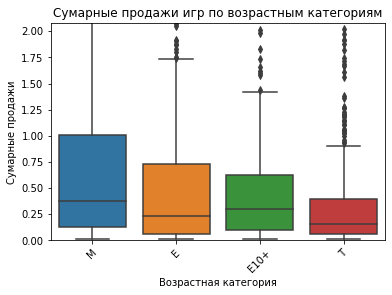

In [77]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='rating', y='total_sales', data=actual_data)
plt.title('Cумарные продажи игр по возрастным категориям')
plt.xlabel('Возрастная категория')
plt.ylim(0, actual_data['total_sales'].quantile(0.95))
plt.ylabel('Cумарные продажи')
plt.xticks(rotation=45)
plt.show()

In [78]:
ESRB_genre_sales = (actual_data.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']]
                         .sum())

In [79]:
ESRB_genre_sales

,na_sales,eu_sales,jp_sales
rating,,,
E,112.26,112.80,28.33
E10+,75.70,55.37,8.19
M,231.57,193.96,21.20
T,66.02,52.96,26.02


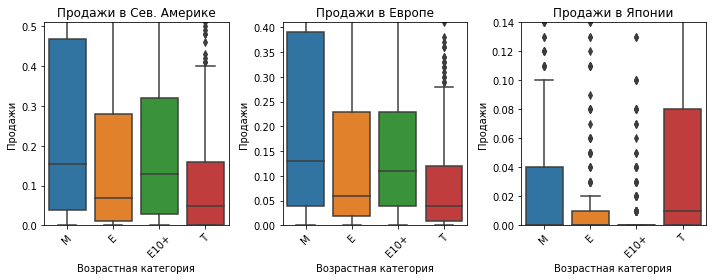

In [80]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1) # первый график
sns.boxplot(x='rating', y='na_sales', data=actual_data)
plt.title('Продажи в Сев. Америке')
plt.xlabel('Возрастная категория')
plt.ylim(0, actual_data['na_sales'].quantile(0.9))
plt.ylabel('Продажи')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2) # первый график
sns.boxplot(x='rating', y='eu_sales', data=actual_data)
plt.title('Продажи в Европе')
plt.xlabel('Возрастная категория')
plt.ylim(0, actual_data['eu_sales'].quantile(0.9))
plt.ylabel('Продажи')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3) # первый график
sns.boxplot(x='rating', y='jp_sales', data=actual_data)
plt.title('Продажи в Японии')
plt.xlabel('Возрастная категория')
plt.ylim(0, actual_data['jp_sales'].quantile(0.9))
plt.ylabel('Продажи')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [81]:
# Группировка данных по рейтингу и расчет медианы
median_data = actual_data.groupby('rating')[['na_sales','eu_sales','jp_sales']].agg('median')

# Вывод результатов
print(median_data)

        na_sales  eu_sales  jp_sales
rating                              
E          0.070      0.06      0.00
E10+       0.130      0.11      0.00
M          0.155      0.13      0.00
T          0.050      0.04      0.01


В Америке и Европе наблюдается общий тренд в продажах игр по возрастным категориям. Самыми прибыльными являются игры категории Mature 17+, у которых медиана продаж составляет 160 и 130 тыс копий соответственно. Это объясняется тем, что данная категория игр предназначена для взрослых пользователей, которые приобретают игры самостоятельно. Игры категории "Для всех" (Е - Everyone) продаются менее успешно по сравнению с категорией "Mature", однако все равно имеют высокий уровень продаж, с медианой 90 тыс. копий как для Америки так и для Европы.

Самые низкие продажи в Европе и Америке наблюдаются у игр категории Teen (T - подросткам 13+ лет) с медианой 40-50 тыс. копий, что также логично, так как эти игры покупаются родителями, и такая категория подразумевает содержание элементов,таких как ненормативная лексика и насилие, не подходящие для детей по мнению родителей. 

Интересно, что в Японии категория Teen оказалась самой прибыльной, с медианой около 10 тыс. копий.  Это может быть связано с предпочтениями взрослых японских игроков, которые приобретают игры самостоятельно. В то же время игры категорий "Для всех" и "Для детей от 10 лет" продаются в Японии очень слабо.

Таким образом, возрастная категория также является фактором успеха, и более выгодно создавать игры для взрослых категории "Mature" для рынка Европы и Америки, а для Японии - категории "Teen".

#### Проверка гипотез

##### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?


Для проведения проверки гипотезы о равенстве средних пользовательских рейтингов платформ Xbox One и PC необходимо использовать двухвыборочный t-тест для независимых выборок. 

Нулевая гипотеза будет звучать как "Средние пользовательские рейтинги платформ Xbox One и PC равны"

Альтернативная гипотеза будет звучать как "Средние пользовательские рейтинги платформ Xbox One и PC различаются".

Перед использованием теста Стьюдента нужно избавиться от пустых значений, инчае будет ошибка

In [82]:
# проверка размера до манипуляций
actual_data.shape

(2885, 12)

In [83]:
# Удаление пустых в столбце оценок пользователей
actual_data = actual_data.dropna(subset = ['user_score'])

In [84]:
# проверка размера после манипуляций
actual_data.shape

(1579, 12)

In [85]:
# Нужно выбрать из датасэта данные по двум платформам
XOne_data = actual_data[actual_data['platform'] == 'XOne']
PC_data = actual_data[actual_data['platform'] == 'PC']

In [86]:
# Выбрать пользователльские рейтинги для обоих платформ
XOne_rating = XOne_data['user_score']
PC_rating = PC_data['user_score']

In [87]:
print('Количество оценок пользователей за 5 лет об играх на Xbox:', len(XOne_rating))
print('Количество оценок пользователей за 5 лет об играх на PC:', len(PC_rating))

Количество оценок пользователей за 5 лет об играх на Xbox: 185
Количество оценок пользователей за 5 лет об играх на PC: 207


In [88]:
alpha = 0.05
results = stats.ttest_ind(XOne_rating,
                          PC_rating,
                          alternative='two-sided')


print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.5747220188229722
Не получилось отвергнуть нулевую гипотезу


Тест Стьюдента подсказывает, что верна нулевая гипотеза, а значит весомой разницы в средней оценке игр для PC и XOne нет. Визуализируем.

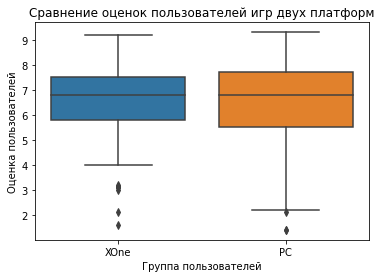

In [89]:
# Боксплот оценок пользователей двух платформ
# пришлось собрать данные в датафрейм, 
# потому что график принимает на вход такой формат
df = pd.DataFrame(
    {'XOne': XOne_rating, 'PC': PC_rating}
)

# Создание boxplot
sns.boxplot(data=df)
plt.xlabel('Группа пользователей')
plt.ylabel('Оценка пользователей')
plt.title('Сравнение оценок пользователей игр двух платформ')
plt.show()

Дейвствительно, ящик с усами наглядно демонстрирует, что разницы в оценках в среднем нет

Нам удалось статистически показать, что средние пользовательские рейтинги платформ игры для платформ Xbox One и PC за последние 5 лет не различаются.

##### Средние пользовательские рейтинги жанров Action  и Sports  разные?

Нулевая гипотеза будет звучать так: Средние пользовательские рейтинги жанров Action и Sports **равны**.

Альтернативная гипотеза будет: Средние пользовательские рейтинги жанров Action и Sports различаются.

Для проверки различия средних двух независимых выборок будем использовать метод stats.ttest_ind 

In [90]:
# Нужно выбрать из датасэта данные по двум платформам
аction_data = actual_data[actual_data['genre'] == 'Action']
sports_data = actual_data[actual_data['genre'] == 'Sports']

In [91]:
# Выбрать пользователльские рейтинги для обоих платформ
action_rating = аction_data['user_score']
sport_rating = sports_data['user_score']

In [92]:
print('Количество оценок пользователей за 5 лет об играх жанра Action:', len(action_rating))
print('Количество оценок пользователей за 5 лет об играх жанра Sport:', len(sport_rating))

Количество оценок пользователей за 5 лет об играх жанра Action: 543
Количество оценок пользователей за 5 лет об играх жанра Sport: 198


Выборки сильно разного размера, укажу параметр о равенстве диспрсий equal_var=False

In [93]:
alpha = 0.05
results = stats.ttest_ind(action_rating, 
                          sport_rating, 
                          equal_var=False)


print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.921804203672074e-18
Отвергаем нулевую гипотезу


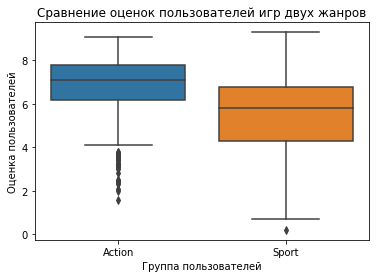

In [94]:
# Боксплот оценок пользователей двух платформ

df = pd.DataFrame(
    {'Action': action_rating, 'Sport': sport_rating}
)

# Создание boxplot
sns.boxplot(data=df)
plt.xlabel('Группа пользователей')
plt.ylabel('Оценка пользователей')
plt.title('Сравнение оценок пользователей игр двух жанров')
plt.show()

Боксплот подтверждает, средние не равны. Оценка пользователей игр жанка "Экшон" выше.

In [95]:
print("Разница между средним двух жанров",action_rating.mean()-sport_rating.mean())

Разница между средним двух жанров 1.3008901166359728


**Подвывод** Нам удалось показать статистически начимую разницу в оценках пользователей между двумя жанрами игр, и выяснить, что оценки пользователей для игр жанра "Экшон" (Action), в среднем выше, чем для игр жанра "Спорт" на 1.3 бала. 

##### Японцы предпочитают карманные игры?

В процессе исследования платформ в разных регионах у меня возникла гипотеза, о том, что японцы предпочитают карманные игровые патформы и игры к ним лучше продаются в Японии. Попробую проверить.

In [96]:
# список платформ в данных за последние 5 лет
actual_data['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'WiiU', 'Wii', 'XOne', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

С помощью гугла легко обнаружить, что из этого списка карманные платформы: '3DS','DS','PSP','PSV','WiiU'.Обычные станицонарные платформы:'PS3','X360','PS4','Wii','XOne','PC'. Напишем функцию, которая поделит игры на две категории - для карманных консолей и стационарных игровых платформ.

In [97]:
# тело функции
def categorize_platform(platform):
    pocket_platforms = ['3DS', 'DS', 'PSP', 'PSV', 'WiiU']
    if platform in pocket_platforms:
        return 'pocket'
    else:
        return 'stationary'
    
#  запишем данные с функции в новый столбец  
actual_data['platform_category'] = actual_data['platform'].apply(categorize_platform)

In [98]:
actual_data['platform_category'].value_counts()

stationary    1206
pocket         373
Name: platform_category, dtype: int64

Количество игр для карманных консолей в 4 раза меньше

In [99]:
# сводная таблица с данными в которую суммируем продажи в каждом регионе
# в зависимости от категории платформ
pivot_table = (actual_data.pivot_table(index='platform_category',
                                       values=['na_sales', 'eu_sales', 'jp_sales'],
                                       aggfunc='sum'))



In [100]:
pivot_table

,eu_sales,jp_sales,na_sales
platform_category,,,
pocket,53.06,45.45,72.06
stationary,361.93,36.49,412.40


In [101]:
# меняем местами столбцы и строки
pivot_table = pivot_table.transpose()

In [102]:
# добавляем новый столбец с соотношением продаж от карманных приставок к общему количеству продаж
# для каждого региона
pivot_table['pocket_sales_ratio'] = (
    (pivot_table['pocket'] / pivot_table[['pocket', 'stationary']].sum(axis=1)) * 100
)

In [103]:
pivot_table

platform_category,pocket,stationary,pocket_sales_ratio
eu_sales,53.06,361.93,12.785850
jp_sales,45.45,36.49,55.467415
na_sales,72.06,412.40,14.874293


В результате мы видим из сводной таблицы, продажи игр для карманнх приставок составлют в Японии больше половины всех продаваемых игр (55.5%), в то время как в Европе и Америке процент игр для консолей всего 12-14%. Да, похоже Япония целевой рынок для продажи игр для карманных консолей.

# Итоговый вывод

В результате проведения исследования нам удалось выявить закономерности определяющие успеность игр, и можем спрогнозировать продажи потенциально популярных игр на следующий год.

В соответсвии с поставленными задачами мы выяснили: 
1. При анализеданных данныз за актуальный период (5 лет) мы выяснили,
 - что игры разрабатываемые для платформ XOne и PS4 и PS3будут обладать большими шансами стать популрными, поскольку их медианные продажи в диапозоне 200-300 тыс копий игр. 
 - Платформа PS3 имеет интересный выброс в виде игры GTA 5, продавшейся в количестве больше 20 миллионов копий.
 - Патформы Wii, 3DS имеют медианные значения продаж около 100 тыс., скорее всего, постепенно потеряют актуальность в ближайшем будущем. 
 - Самыми не рентабельными являются PSP и PSV с медианами около 50 тыс копий игр, разработка игр для этих платформ будет потенциально не прибыльной. 
 
2. Влияние критиков на продажи игр варьируется в зависимости от платформы, и обычно рейтинги критиков слабо-умеренно влияют на продажи, коэффициент корреляции составляет около 0.3-0.4. 
 - Владельцы PS4 и XboxOne чаще прислушиваются к мнению критиков, и у них зависимость рейтинга критиков и продаж чуточку выше, чем у остальных платформ. 
 - Отзывы пользователей, в свою очередь, не оказывают значительного влияния на продажи. 
 
 Было бы интересно посмотреть зависимости от цены конкретных игр, например, влияние критиков было бы выше при покупке дорогих игр.
 
3. Оценка жанров показала, что
 - Жанр "Шутеры" является одним из самых продаваемых и прибыльных на рынке, с медианой 440 тыс. копий, хотя доля игр в этом жанре составляет всего 8 процентов.
 - Жанры "Экшон", "Спорт", "RPG" и "Платформеры" также пользуются стабильным спросом, с медианой от 140 до 240 тыс.копий.
 - жанры "Файтинги" и "Приключения" имеют низкие объемы продаж.
 
 Я бы рекомендовала вкладываться именно в 'Шутеры", с учетом того, что сверхприбыльные игры именно в этом жанре, у них больше шансов получить высокие продажи, чем у остальных жанров.
 
4. Дифференциальный анализ регионов:
 - Платформы WiiU и PSV более популярны в Японии, 
 - Xbox360 и XboxOne - в Европе и Америке. 
 - Близкое распределение жанров в Европе и Америке, у обоих на первом месте игры в стиле Экшон(Action), Шутеры, Спортивные и ролевые игры.
  - Япония отличается по наботу топ жанров, хотя там тоже любят ролевые игры и Экшон, в пятерке присутствуют Файтинги и Симуляции, которые не вошли в пятерку в Европе и Америке.

5. При проверке конкретных гипотез мы выяснили:
- Среднее между рейтингами пользователей на PC и XBox не отличается значительно.  
- Нам удалось показать статистически начимую разницу в оценках пользователей между двумя жанрами игр, и выяснить, что оценки пользователей для игр жанра "Экшон" (Action), в среднем выше, чем для игр жанра "Спорт" на 1.3 бала.
- обнаружили интересный факт, о том, что в Японии предпочитают карманные игровые приставки стационарным и игры к ним соответственно. 

Таким образом, самые прибыльные рынки это Америка и Европа, которые предпочитают игры на платформах XOne и PS4, в жанре "Шутеры", "Экшон", "Спорт", "RPG". Наше исследование помогло получить ценную информацию об игровых предпочтениях пользователей разных стран, так например Японцы предпочитают карманые консоли. Изучив данные за актуальный период мы определили игровые платформы и жанры которые будут популярные в ближайшее время. Мы смогли выявить различия и сходства между рынками игр разных стран, эта информация позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.